## Create a short overview notebook for important general information about the data

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns


In [3]:
df_train =  pd.read_csv("../data/train.csv")
df_train.head(5)


,sample_id,image_path,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target
0,ID1011485656__Dry_Clover_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Clover_g,0.0000
1,ID1011485656__Dry_Dead_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Dead_g,31.9984
2,ID1011485656__Dry_Green_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Green_g,16.2751
3,ID1011485656__Dry_Total_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Total_g,48.2735
4,ID1011485656__GDM_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,GDM_g,16.2750


In [4]:
df_train.describe()
print(df_train.isna().sum())

sample_id        0
image_path       0
Sampling_Date    0
State            0
Species          0
Pre_GSHH_NDVI    0
Height_Ave_cm    0
target_name      0
target           0
dtype: int64


In [5]:
target_names = pd.unique(df_train["target_name"])
print(target_names) #GDM being "Green dry mass"

['Dry_Clover_g' 'Dry_Dead_g' 'Dry_Green_g' 'Dry_Total_g' 'GDM_g']


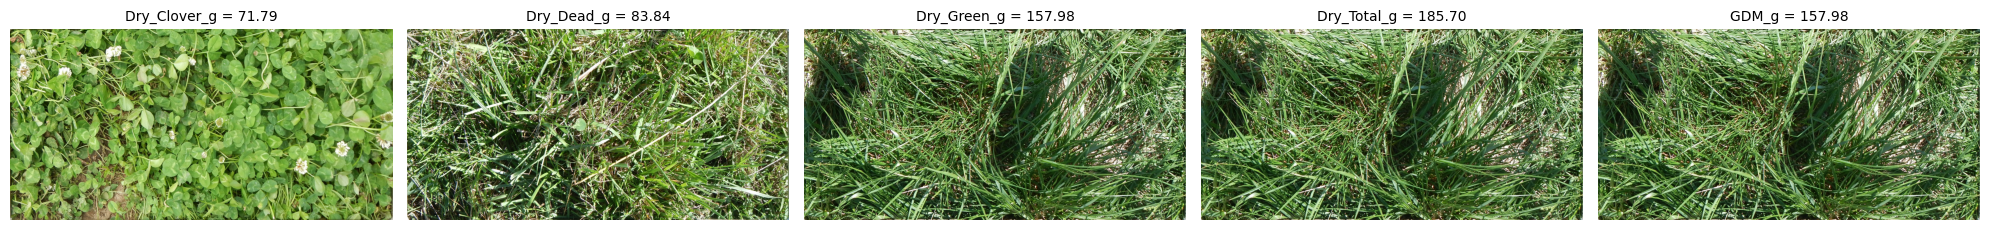

In [ ]:

df_best = df_train.loc[df_train.groupby('target_name')['target'].idxmax()]
df_best = df_best.set_index('target_name').loc[target_names].reset_index()

n = len(df_best)
fig, axes = plt.subplots(1, n, figsize=(4 * n, 4))
if n == 1:
    axes = [axes]

for ax, (_, row) in zip(axes, df_best.iterrows()):
    img = Image.open(f"../data/{row['image_path']}")
    ax.imshow(img)
    ax.set_title(f"{row['target_name']} = {row['target']:.2f}", fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()